In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, LSTM, TimeDistributed, RepeatVector
#from keras.layers.normalization import BatchNormalization
#from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
n_in = 168 #历史数量
n_out = 24 #预测数量
n_features = 1
# n_test = 1
n_val = 1
n_epochs = 250

In [16]:
pd.read_excel('data3.xlsx')

,a1,a2
0,2020100100,670718
1,2020100101,648975
2,2020100102,635599
3,2020100103,536269
4,2020100104,356870
...,...,...
739,2020103119,789165
740,2020103120,818590
741,2020103121,804708
742,2020103122,748938


In [3]:
#d导入数据
def load_stw_data() -> pd.DataFrame:
    
    df_stw = pd.read_excel('data3.xlsx')
    df_stw.columns = ['BillingDate', 'VolumnHL']
    
    return df_stw

In [4]:
#MinMaxScaler数据归一化，可以帮助网络模型更快的拟合，稍微有一些提高准确率的效果
def minmaxscaler(data: pd.DataFrame) -> pd.DataFrame:
    
    volume = data.VolumnHL.values
    volume = volume.reshape(len(volume), 1)
    volume = scaler.fit_transform(volume)
    volume = volume.reshape(len(volume),)    
    data['VolumnHL'] = volume
        
    return data

In [5]:
#划分训练数据集和验证数据集,这里需要注意的是我么需要预测的数据是不可以出现在训练中的，切记。
def split_data(x, y, n_test: int):
    
    x_train = x[:-n_val-n_out+1]
    x_val = x[-n_val:]
    y_train = y[:-n_val-n_out+1]
    y_val = y[-n_val:]
    
    return x_train, y_train, x_val, y_val

In [6]:
#划分X和Y
def build_train(train, n_in, n_out):
    
    train = train.drop(["BillingDate"], axis=1)
    X_train, Y_train = [], []
    for i in range(train.shape[0]-n_in-n_out+1):
        X_train.append(np.array(train.iloc[i:i+n_in]))
        Y_train.append(np.array(train.iloc[i+n_in:i+n_in+n_out]["VolumnHL"]))
        
    return np.array(X_train), np.array(Y_train)

In [7]:
#构建最简单的LSTM
def build_lstm(n_in: int, n_features: int):
    
    model = Sequential()
    model.add(LSTM(12, activation='relu', input_shape=(n_in, n_features)))
    model.add(Dropout(0.3))
    model.add(Dense(n_out))
    model.compile(optimizer='adam', loss='mae')
    
    return model

In [8]:
#模型拟合
def model_fit(x_train, y_train, x_val, y_val, n_features):
    
    model = build_lstm(
        n_in   = n_in,
        n_features= 1
    )
    model.compile(loss='mae', optimizer='adam')
    model.fit(x_train, y_train, epochs=n_epochs, batch_size=128, verbose=1,  validation_data=(x_val, y_val))
    m = model.evaluate(x_val, y_val)
    print(m)
    
    return model

In [9]:
data = load_stw_data()
scaler = MinMaxScaler(feature_range=(0, 1))
data = minmaxscaler(data)

In [10]:
data_copy = data.copy()
x, y = build_train(data_copy, n_in, n_out)
x_train, y_train, x_val, y_val = split_data(x, y, n_val)
model = build_lstm(n_in, 1)
model = model_fit(x_train, y_train, x_val, y_val, 1)
predict = model.predict(x_val)  

Epoch 1/250
5/5 [==============================] - 1s 89ms/step - loss: 0.5881 - val_loss: 0.5745
Epoch 2/250
5/5 [==============================] - 0s 46ms/step - loss: 0.5734 - val_loss: 0.5603
Epoch 3/250
5/5 [==============================] - 0s 47ms/step - loss: 0.5608 - val_loss: 0.5450
Epoch 4/250
5/5 [==============================] - 0s 46ms/step - loss: 0.5468 - val_loss: 0.5280
Epoch 5/250
5/5 [==============================] - 0s 46ms/step - loss: 0.5312 - val_loss: 0.5088
Epoch 6/250
5/5 [==============================] - 0s 44ms/step - loss: 0.5149 - val_loss: 0.4868
Epoch 7/250
5/5 [==============================] - 0s 46ms/step - loss: 0.4959 - val_loss: 0.4600
Epoch 8/250
5/5 [==============================] - 0s 45ms/step - loss: 0.4755 - val_loss: 0.4271
Epoch 9/250
5/5 [==============================] - 0s 46ms/step - loss: 0.4581 - val_loss: 0.4057
Epoch 10/250
5/5 [==============================] - 0s 46ms/step - loss: 0.4355 - val_loss: 0.3810
Epoch 11/250
5/5 [=

Epoch 84/250
5/5 [==============================] - 0s 45ms/step - loss: 0.1925 - val_loss: 0.1601
Epoch 85/250
5/5 [==============================] - 0s 46ms/step - loss: 0.1942 - val_loss: 0.1603
Epoch 86/250
5/5 [==============================] - 0s 46ms/step - loss: 0.1924 - val_loss: 0.1648
Epoch 87/250
5/5 [==============================] - 0s 44ms/step - loss: 0.1900 - val_loss: 0.1587
Epoch 88/250
5/5 [==============================] - 0s 45ms/step - loss: 0.1929 - val_loss: 0.1597
Epoch 89/250
5/5 [==============================] - 0s 44ms/step - loss: 0.1905 - val_loss: 0.1621
Epoch 90/250
5/5 [==============================] - 0s 45ms/step - loss: 0.1876 - val_loss: 0.1595
Epoch 91/250
5/5 [==============================] - 0s 44ms/step - loss: 0.1849 - val_loss: 0.1598
Epoch 92/250
5/5 [==============================] - 0s 45ms/step - loss: 0.1899 - val_loss: 0.1591
Epoch 93/250
5/5 [==============================] - 0s 47ms/step - loss: 0.1870 - val_loss: 0.1610
Epoch 94/2

5/5 [==============================] - 0s 46ms/step - loss: 0.1375 - val_loss: 0.0826
Epoch 167/250
5/5 [==============================] - 0s 45ms/step - loss: 0.1377 - val_loss: 0.0806
Epoch 168/250
5/5 [==============================] - 0s 45ms/step - loss: 0.1337 - val_loss: 0.0813
Epoch 169/250
5/5 [==============================] - 0s 46ms/step - loss: 0.1354 - val_loss: 0.0819
Epoch 170/250
5/5 [==============================] - 0s 46ms/step - loss: 0.1326 - val_loss: 0.0820
Epoch 171/250
5/5 [==============================] - 0s 45ms/step - loss: 0.1309 - val_loss: 0.0819
Epoch 172/250
5/5 [==============================] - 0s 46ms/step - loss: 0.1292 - val_loss: 0.0824
Epoch 173/250
5/5 [==============================] - 0s 47ms/step - loss: 0.1291 - val_loss: 0.0826
Epoch 174/250
5/5 [==============================] - 0s 46ms/step - loss: 0.1286 - val_loss: 0.0821
Epoch 175/250
5/5 [==============================] - 0s 45ms/step - loss: 0.1330 - val_loss: 0.0813
Epoch 176/250


5/5 [==============================] - 0s 46ms/step - loss: 0.1141 - val_loss: 0.0751
Epoch 249/250
5/5 [==============================] - 0s 45ms/step - loss: 0.1133 - val_loss: 0.0750
Epoch 250/250
1/1 [==============================] - 0s 16ms/step - loss: 0.0743
0.07428563386201859


In [11]:
# predict = model.predict(x_val)  
validation = scaler.inverse_transform(predict)[0]
validation

array([646030.8 , 603173.7 , 555099.94, 511711.62, 488886.34, 470881.44,
       467991.22, 472382.8 , 486081.25, 499696.2 , 515863.88, 532184.1 ,
       558283.75, 586110.44, 621631.75, 652905.9 , 695607.56, 710636.  ,
       735091.1 , 740907.56, 744258.06, 733514.  , 700775.1 , 677446.25],
      dtype=float32)

In [12]:
actual = scaler.inverse_transform(y_val)[0]
actual

array([639457., 620449., 611584., 493739., 323143., 329209., 350783.,
       403793., 449446., 489899., 528206., 563321., 594820., 608519.,
       616327., 626740., 640685., 673864., 739997., 789165., 818590.,
       804708., 748938., 694595.])

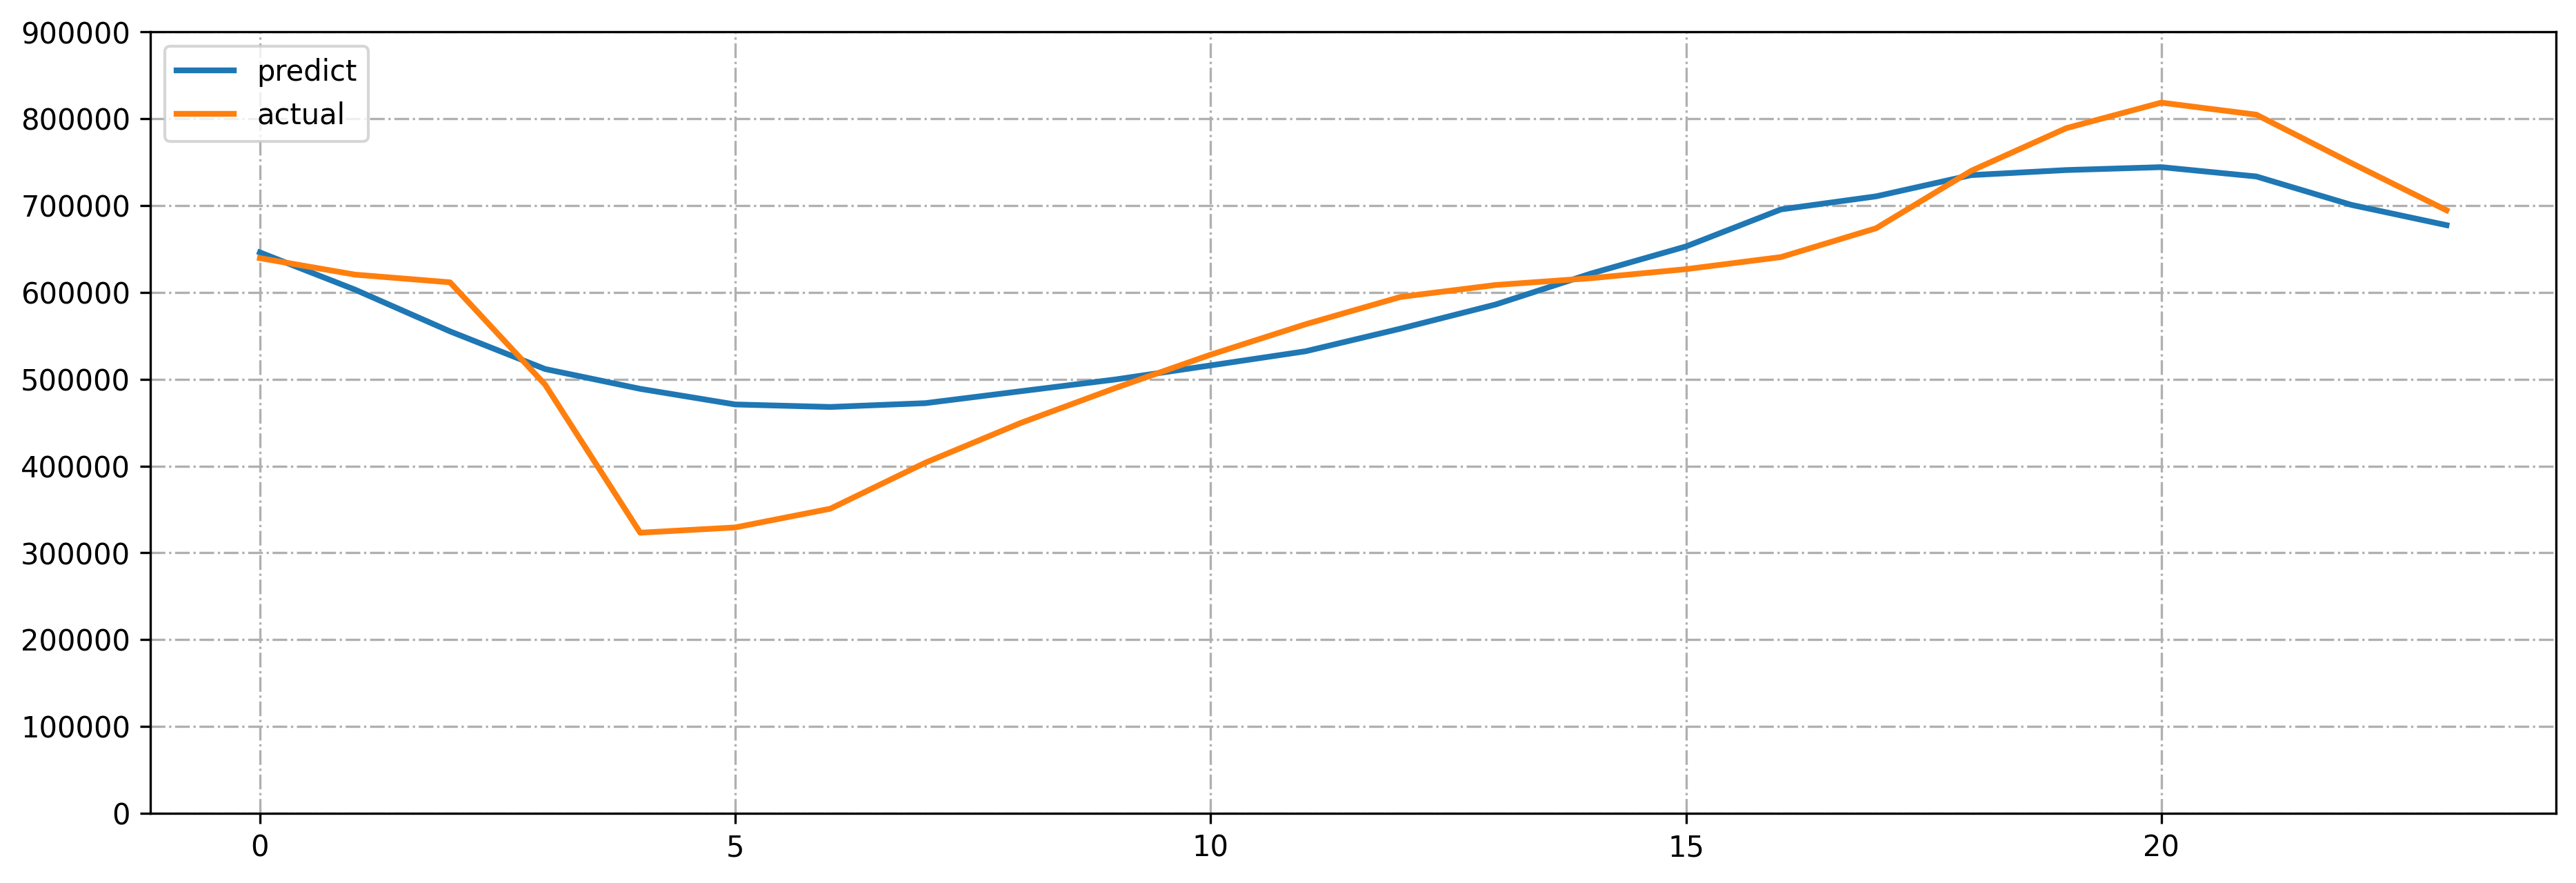

In [13]:
predict = validation
actual = actual
x = [x for x in range(24)]
fig, ax = plt.subplots(figsize=(15,5),dpi = 300)
ax.plot(x, predict, linewidth=2.0,label = "predict")
ax.plot(x, actual, linewidth=2.0,label = "actual")
ax.legend(loc=2);
# ax.set_title(bf_name)
plt.ylim((0, 900000))
plt.grid(linestyle='-.')
plt.show()

In [14]:
#ACC
error = 0
summery = 0
for i in range(24):
    error += abs(predict[i] - actual[i])
    summery += actual[i]
acc = 1 - error/summery
acc

0.9203712027568972